In [1]:
import torch
import torchvision
import numpy as np

In [2]:
torch.cuda.device_count()

1

In [3]:
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [7]:
model = AE(input_shape=784).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

In [24]:
transform = transforms.Compose([transforms.ToTensor()])

In [11]:

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transforms.ToTensor(), download=True
)

In [8]:
test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transforms.ToTensor(), download=True
)


100.0%


Extracting /home/tugash/torch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to /home/tugash/torch_datasets/MNIST/raw



102.8%


Extracting /home/tugash/torch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /home/tugash/torch_datasets/MNIST/raw



100.0%


Extracting /home/tugash/torch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/tugash/torch_datasets/MNIST/raw



112.7%

Extracting /home/tugash/torch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/tugash/torch_datasets/MNIST/raw




/home/tugash/miniconda3/envs/tissue_explorer/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:179.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [15]:
epochs = 20
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))


epoch : 1/20, loss = 0.017245
epoch : 2/20, loss = 0.015888
epoch : 3/20, loss = 0.015227
epoch : 4/20, loss = 0.014795
epoch : 5/20, loss = 0.014459
epoch : 6/20, loss = 0.014174
epoch : 7/20, loss = 0.013954
epoch : 8/20, loss = 0.013777
epoch : 9/20, loss = 0.013634
epoch : 10/20, loss = 0.013536
epoch : 11/20, loss = 0.013441
epoch : 12/20, loss = 0.013357
epoch : 13/20, loss = 0.013275
epoch : 14/20, loss = 0.013189
epoch : 15/20, loss = 0.013117
epoch : 16/20, loss = 0.013063
epoch : 17/20, loss = 0.013001
epoch : 18/20, loss = 0.012955
epoch : 19/20, loss = 0.012905
epoch : 20/20, loss = 0.012862


In [ ]:
train_loader


In [20]:
test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transforms.ToTensor(), download=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False
)

test_examples = None

with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features.view(-1, 784).to(device)
        reconstruction = model(test_examples)
        break

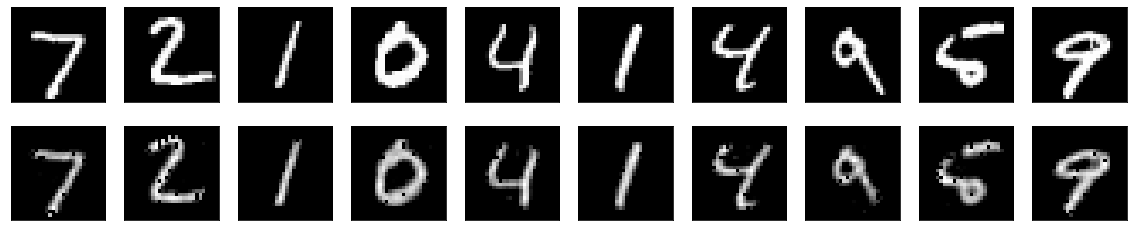

In [30]:
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [27]:
import matplotlib.pyplot as plt

In [26]:
!conda install -c conda-forge matplotlib  -y

Solving environment: done

## Package Plan ##

  environment location: /home/tugash/miniconda3/envs/tissue_explorer

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    dbus-1.13.6                |       he372182_0         602 KB  conda-forge
    fontconfig-2.13.1          |    he4413a7_1000         327 KB  conda-forge
    freetype-2.10.4            |       h7ca028e_0         912 KB  conda-forge
    glib-2.68.0                |       h36276a3_0         3.0 MB
    gst-plugins-base-1.14.0    |       hbbd80ab_1         4.8 MB
    gstreamer-1.14.0           |       h28cd5cc_2         3.2 MB
    icu-58.2                   |    hf484d3e_1000        22.6 MB  conda-forge
    jpeg-9d                    |       h36c2e

In [25]:
!y

zsh:1: command not found: y
